# Analyse de la variance à deux facteurs

## Niveaux de pollution en Occitanie

Auteurs : Mégane BOYER, Mathias GOUT, Emeline TOUSTOU

Nous illustrons le cours de l'ANOVA à deux facteurs sur des données relatives à la pollution en Occitanie. Notre but sera de discuter de la qualité de l'air au vu de deux critères: l'influence et la typologie .
Dans un premier temps, nous utiliserons une fonction Python pour effectuer l'ANOVA puis nous implémenterons les formules du cours afin de retrouver les résultats.

## Importations

In [1]:
import os
import sys

sys.path.append("./codes")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

plt.rcParams.update({'figure.max_open_warning': 25})

## Préparation des données

Nous commençons par charger et visualiser les données relatives à la pollution en Occitanie.

In [2]:
from download import download
url = "http://josephsalmon.eu/enseignement/datasets/Mesure_journaliere_Region_Occitanie_Polluants_Principaux.csv"
path_target = "datasets/Mesure_journaliere_Region_Occitanie_Polluants_Principaux.csv"
download(url, path_target, replace=False)

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


'datasets/Mesure_journaliere_Region_Occitanie_Polluants_Principaux.csv'

In [3]:
data = pd.read_csv(path_target)
data.head(100)

,X,Y,id,nom_dep,nom_com,code_insee,nom_station,code_station,typologie,influence,...,metrique,date_debut,date_fin,statut_valid,x_l93,y_l93,x_wgs84,y_wgs84,geom,FID
0,1.41861,43.5756,12001,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Jacquier Urbain\n,FR12004,urban,Fond,...,journaliere,2017-12-15T01:00:00.000Z,2017-12-16T00:00:00.000Z,t,572227,6276450,1.41861,43.5756,0101000020E610000000000080A1B2F63F000000E0ABC9...,12001
1,1.41861,43.5756,12002,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Jacquier Urbain\n,FR12004,urban,Fond,...,journaliere,2017-12-16T01:00:00.000Z,2017-12-17T00:00:00.000Z,t,572227,6276450,1.41861,43.5756,0101000020E610000000000080A1B2F63F000000E0ABC9...,12002
2,1.41861,43.5756,12003,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Jacquier Urbain\n,FR12004,urban,Fond,...,journaliere,2017-12-17T01:00:00.000Z,2017-12-18T00:00:00.000Z,t,572227,6276450,1.41861,43.5756,0101000020E610000000000080A1B2F63F000000E0ABC9...,12003
3,1.41861,43.5756,12004,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Jacquier Urbain\n,FR12004,urban,Fond,...,journaliere,2017-12-18T01:00:00.000Z,2017-12-19T00:00:00.000Z,t,572227,6276450,1.41861,43.5756,0101000020E610000000000080A1B2F63F000000E0ABC9...,12004
4,1.41861,43.5756,12005,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Jacquier Urbain\n,FR12004,urban,Fond,...,journaliere,2017-12-19T01:00:00.000Z,2017-12-20T00:00:00.000Z,t,572227,6276450,1.41861,43.5756,0101000020E610000000000080A1B2F63F000000E0ABC9...,12005
5,1.41861,43.5756,12006,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Jacquier Urbain\n,FR12004,urban,Fond,...,journaliere,2017-12-20T01:00:00.000Z,2017-12-21T00:00:00.000Z,t,572227,6276450,1.41861,43.5756,0101000020E610000000000080A1B2F63F000000E0ABC9...,12006
6,1.41861,43.5756,12007,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Jacquier Urbain\n,FR12004,urban,Fond,...,journaliere,2017-12-21T01:00:00.000Z,2017-12-22T00:00:00.000Z,t,572227,6276450,1.41861,43.5756,0101000020E610000000000080A1B2F63F000000E0ABC9...,12007
7,1.41861,43.5756,12008,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Jacquier Urbain\n,FR12004,urban,Fond,...,journaliere,2017-12-22T01:00:00.000Z,2017-12-23T00:00:00.000Z,t,572227,6276450,1.41861,43.5756,0101000020E610000000000080A1B2F63F000000E0ABC9...,12008
8,1.41861,43.5756,12009,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Jacquier Urbain\n,FR12004,urban,Fond,...,journaliere,2017-12-23T01:00:00.000Z,2017-12-24T00:00:00.000Z,t,572227,6276450,1.41861,43.5756,0101000020E610000000000080A1B2F63F000000E0ABC9...,12009
9,1.41861,43.5756,12010,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Jacquier Urbain\n,FR12004,urban,Fond,...,journaliere,2017-12-24T01:00:00.000Z,2017-12-25T00:00:00.000Z,t,572227,6276450,1.41861,43.5756,0101000020E610000000000080A1B2F63F000000E0ABC9...,12010


Nous affichons les noms des modalités de la variable `influence` du jeu de données.

In [4]:
data['influence'].unique()

array(['Fond', 'Industrielle', 'Trafic'], dtype=object)

Nous affichons les noms des modalités de la variable `typologie` du jeu de données.

In [5]:
data['typologie'].unique()

array(['urban', 'rural-regional', 'rural-nearcity', 'suburban',
       'rural-remote'], dtype=object)

Nous créons une nouvelle variable : `day`.

In [6]:
data["day"] = pd.to_datetime(data["date_debut"])

Nous sélectionnons les variables utiles pour réaliser l'ANOVA.

In [7]:
data_utile = data[["polluant","valeur_originale","typologie","influence","day"]]

Nous sélectionnons les individus. Seule cette sélection de modalités permet d'avoir un plan équilibré.

In [8]:
data_utile = data_utile[data_utile["polluant"] == "NO"]
data_utile = data_utile[data_utile["influence"].isin(["Fond","Trafic"])]
data_utile = data_utile[data_utile["typologie"].isin(["urban","suburban"])]

Nous choisissons une période de 10 jours pour la réalisation de l'ANOVA.

In [9]:
index = (data_utile["day"] > "2018-09-15") & (data_utile['day'] < "2018-09-25")
data_utile = data_utile.loc[index]

La valeur du polluant NO est mesurée plusieurs fois par jour. Nous faisons donc une moyenne journalière pour avoir un plan équilibré. 
Nous créons ensuite le nouveau dataframe.

In [10]:
suburban = data_utile[data_utile["typologie"] == "suburban"]
urban = data_utile[data_utile["typologie"] == "urban"]
urban_Fond = urban[urban["influence"] == "Fond"]
urban_Trafic = urban[urban["influence"] == "Trafic"]
suburban_Fond = suburban[suburban["influence"] == "Fond"]
suburban_Trafic = suburban[suburban["influence"] == "Trafic"]

data_nouveau = pd.concat([urban_Fond.groupby("day").mean(),urban_Trafic.groupby("day").mean(),suburban_Fond.groupby("day").mean(),suburban_Trafic.groupby("day").mean()])

typologie = np.repeat(["urban","suburban"],20)
influence = np.repeat(["Fond","Trafic","Fond","Trafic"],10)

data_nouveau["typologie"] = typologie
data_nouveau["influence"] = influence
data_nouveau

,valeur_originale,typologie,influence
day,,,
2018-09-15 01:00:00+00:00,3.715312,urban,Fond
2018-09-16 01:00:00+00:00,1.988261,urban,Fond
2018-09-17 01:00:00+00:00,2.348646,urban,Fond
2018-09-18 01:00:00+00:00,2.351327,urban,Fond
2018-09-19 01:00:00+00:00,3.626347,urban,Fond
2018-09-20 01:00:00+00:00,6.810057,urban,Fond
2018-09-21 01:00:00+00:00,2.121640,urban,Fond
2018-09-22 01:00:00+00:00,2.319826,urban,Fond
2018-09-23 01:00:00+00:00,1.750625,urban,Fond


## Réalisation de l'ANOVA

### Méthode 1 : ANOVA avec `statsmodels`

Dans un premier temps, on effectue l'ANOVA à deux facteurs sans intéraction entre les facteurs avec la fonction `anova_lm` de la bibliothèque `statsmodels`.

In [11]:
formula = 'valeur_originale ~ influence + typologie'
model = ols(formula, data_nouveau).fit()
aov_table = anova_lm(model, typ=2)

print(aov_table)

                sum_sq    df          F        PR(>F)
influence  6223.040550   1.0  40.809640  1.875256e-07
typologie  4109.783866   1.0  26.951263  7.796123e-06
Residual   5642.110545  37.0        NaN           NaN


Le modèle est significatif : les deux facteurs ont une influence sur la variable à expliquer, à savoir la valeur du niveau de pollution. En effet, dans le cas de la variable `typologie`, nous rejetons $H_0$ avec un risque d'erreur de 5% : la p-value est inférieure à 0.05. Nous pouvons conclure que, pour la période de temps choisie, le niveau de pollution est différent selon la zone où les mesures ont été effectuées (urbaine ou suburbaine).

Dans le cas de la variable `influence`, nous rejetons $H_0$ avec un risque de 5%. Nous pouvons conclure que, pour la période de temps considérée, le niveau de pollution associé aux différentes modalités de cette variable (proximité d'un trafic routier, fond urbain) est différent.

### Méthode 2 : Implémentation des formules du cours

Nous allons recalculer les valeurs de la table d'ANOVA obtenue précédemment. Nous commençons par les degrés de liberté pour les deux facteurs et les résidus.

In [12]:
N = len(data_nouveau.valeur_originale)
df_influ = len(data_nouveau.influence.unique()) - 1
df_typo = len(data_nouveau.typologie.unique()) - 1
df_res = N - len(data_nouveau.influence.unique()) - len(data_utile.typologie.unique()) + 1

Nous calculons la valeur de $\overline{y_n}$.

In [13]:
grand_mean = data_nouveau['valeur_originale'].mean()

Nous calculons les sommes des carrés pour les deux facteurs.

In [14]:
ssq_influ = sum([(data_nouveau[data_nouveau.influence == l].valeur_originale.mean()-grand_mean)**2 for l in data_nouveau.influence])

ssq_typo = sum([(data_nouveau[data_nouveau.typologie ==l].valeur_originale.mean()-grand_mean)**2 for l in data_nouveau.typologie])

ssq_tot = sum((data_nouveau.valeur_originale - grand_mean)**2)

Nous calculons maintenant la somme des carrés des résidus. Pour cela, nous créons des sous matrices issues des données et nous trouvons les valeurs de $\overline{y_{i::}}$ et de $\overline{y_{:j:}}$ ($i$ et $j$ correspondant aux deux facteurs).

In [15]:
## Division des données selon les modalités de la variable influence.
df_fond = data_nouveau[data_nouveau.influence == 'Fond']
df_trafic = data_nouveau[data_nouveau.influence == 'Trafic']

## Division des données selon les modalités de la variable typologie.
df_urban = data_nouveau[data_nouveau.typologie == 'urban']
df_suburban= data_nouveau[data_nouveau.typologie == 'suburban']

## Calcul des y_(i::) barre.
fond_mean = df_fond.valeur_originale.mean()
trafic_mean = df_trafic.valeur_originale.mean()

## Calcul des y_(:j:) barre.
urban_mean = df_urban.valeur_originale.mean()
suburban_mean = df_suburban.valeur_originale.mean()

Nous calculons maintenant les $\widehat{y_{ij}}$.

In [16]:
## Calcul des estimateurs de y_(ij).
y_fond_urban = fond_mean + urban_mean - grand_mean
y_fond_suburban = fond_mean + suburban_mean - grand_mean
y_trafic_urban = trafic_mean + urban_mean - grand_mean
y_trafic_suburban = trafic_mean + suburban_mean - grand_mean

Nous pouvons maintenant calculer : $$\sum_{i=1}^{I}{\sum_{j=1}^{J}{\sum_{k=1}^{K}{(\widehat{y_{ij}} - y_{ijk})^2}}}$$.

In [17]:
fond_urban = df_fond[df_fond.typologie == 'urban']
fond_suburban = df_fond[df_fond.typologie == 'suburban']

trafic_urban = df_trafic[df_fond.typologie == 'urban']
trafic_suburban = df_trafic[df_fond.typologie == 'suburban']

ssq_res = sum((fond_urban.valeur_originale - y_fond_urban)**2) + sum((fond_suburban.valeur_originale - y_fond_suburban)**2) + sum((trafic_urban.valeur_originale - y_trafic_urban)**2) + sum((trafic_suburban.valeur_originale - y_trafic_suburban)**2)

Nous poursuivons par le calcul des carrés moyens pour les facteurs et les résidus.

In [18]:
## Carrés moyens.

ms_influ = ssq_influ/df_influ

ms_typo = ssq_typo/df_typo

ms_res = ssq_res/df_res

Nous calculons les statistiques F et les p-values associées pour les deux facteurs.

In [19]:
f_influ = ms_influ/ms_res
f_typo = ms_typo/ms_res

p_influ = stats.f.sf(f_influ, df_influ, df_res)
p_typo = stats.f.sf(f_typo, df_typo, df_res)

Enfin, nous affichons la table d'ANOVA qui récapitule ces informations.

In [20]:
resultats = {'sum_sq':[ssq_influ, ssq_typo, ssq_res],
           'df':[df_influ, df_typo, df_res],
           'F':[f_influ, f_typo, 'NaN'],
            'PR(>F)':[p_influ, p_typo, 'NaN']}
colonnes=['sum_sq', 'df', 'F', 'PR(>F)']

aov_table1 = pd.DataFrame(resultats, columns=colonnes,
                          index=['influence', 'typologie', 'Residual'])

print(aov_table1)

                sum_sq  df        F       PR(>F)
influence  6223.040550   1  40.8096  1.87526e-07
typologie  4109.783866   1  26.9513  7.79612e-06
Residual   5642.110545  37      NaN          NaN


Nous retrouvons bien les mêmes résultats que ceux obtenus avec la fonction `anova_lm` de la bibliothèque `statsmodels`.

## Visualisation des données

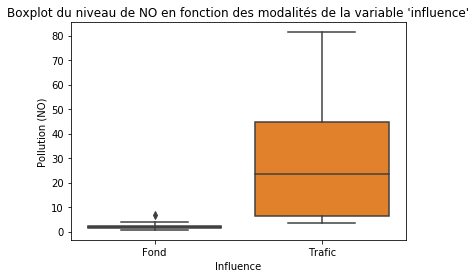

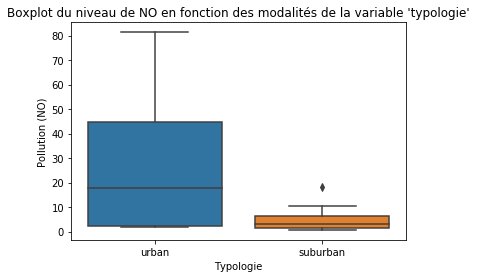

In [21]:
sns.boxplot(data=data_nouveau, x='influence', y='valeur_originale')
plt.xlabel('Influence')
plt.ylabel('Pollution (NO)') 
plt.title("Boxplot du niveau de NO en fonction des modalités de la variable 'influence'")
plt.show()

sns.boxplot(data=data_nouveau, x='typologie', y='valeur_originale')
plt.xlabel('Typologie')
plt.ylabel('Pollution (NO)') 
plt.title("Boxplot du niveau de NO en fonction des modalités de la variable 'typologie'")
plt.show()

Ces graphiques mettent en évidence le fait que les deux facteurs (`influence` et `typologie`) ont une influence sur les niveaux de pollution de NO pour la période de temps considérée. En effet, nous constatons que la pollution est plus importante dans une zone où le trafic routier est dense. De même, la pollution est plus importante en zone urbaine. 

Nous retrouvons le résultat de l'ANOVA c'est-à-dire que les deux facteurs ont une influence sur la qualité de l'air. Les boxplots nous orientent quant aux variations du niveau de pollution en fonction des modalités de ces deux facteurs. 